# Importing all necessary Libraries


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

# Creating Dynamic Data

In [13]:
# Define initial parameters
initial_samples = 30
dynamic_dataset = np.random.rand(initial_samples, 2)
print("DATA:\n",dynamic_dataset)
labels = np.random.choice([0, 1, 2], size=initial_samples)
print("Labels:\n",labels)
n_steps = 20
k = 20
perplexity = 10

DATA:
 [[0.36973767 0.82931229]
 [0.0948671  0.98591777]
 [0.15516159 0.35951807]
 [0.42422937 0.13629219]
 [0.93424519 0.55032479]
 [0.06533637 0.52934355]
 [0.32854266 0.68507341]
 [0.75217969 0.59269894]
 [0.34684943 0.77919796]
 [0.82100629 0.66933522]
 [0.30900486 0.51927339]
 [0.46391326 0.31736492]
 [0.54010633 0.99486356]
 [0.96301419 0.47142082]
 [0.3278319  0.45789486]
 [0.81841861 0.83666943]
 [0.4188818  0.12773327]
 [0.0130291  0.04384703]
 [0.68955986 0.83155182]
 [0.06485926 0.35287073]
 [0.02691364 0.67957825]
 [0.42878388 0.71650441]
 [0.50116547 0.27805386]
 [0.46163379 0.31906796]
 [0.63320349 0.94328496]
 [0.33704608 0.68495244]
 [0.23048879 0.19943727]
 [0.17480136 0.07944982]
 [0.89501503 0.12241423]
 [0.78741926 0.04002243]]
Labels:
 [1 0 1 0 1 2 2 2 2 1 2 2 0 1 1 2 2 2 1 1 1 0 2 1 0 1 2 1 2 0]


# Initialize t-SNE with given parameters

In [7]:
#including initialization and learning rate
tsne = TSNE(n_components=2, perplexity=perplexity, init='random', learning_rate=200.0)
# Lists to store t-SNE results and labels at each time step
tsne_results = []
all_labels = []


# Generate new data points and labels at each time step

Visualization of  t-SNE results at each time step with colored clusters:


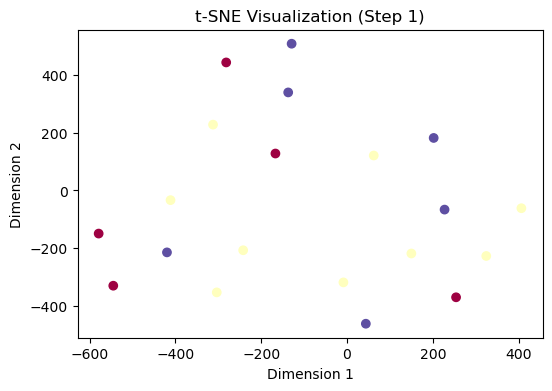

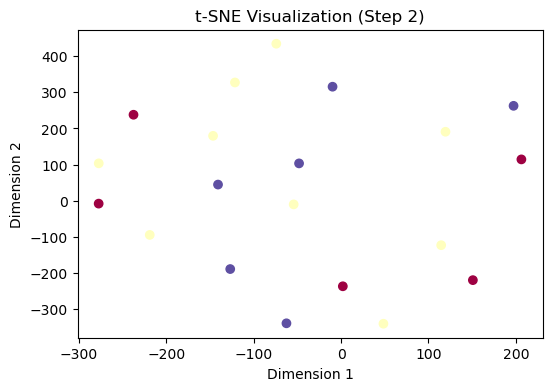

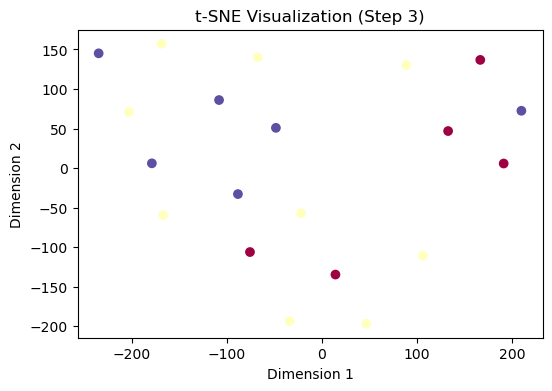

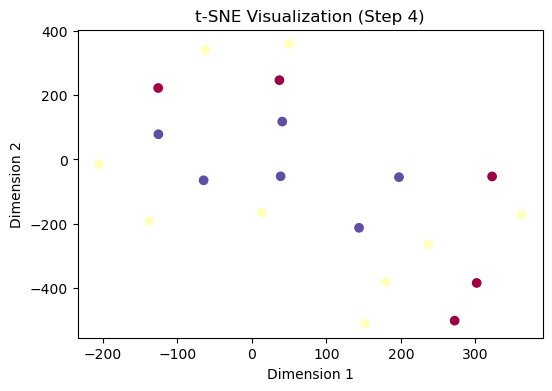

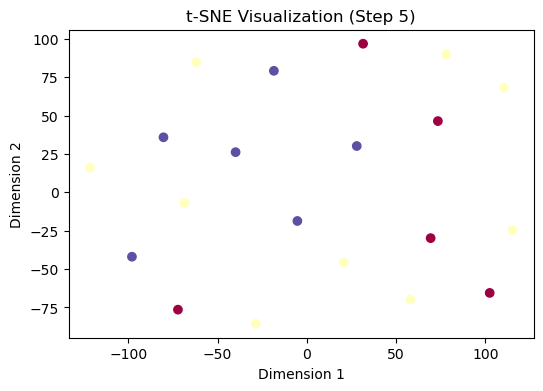

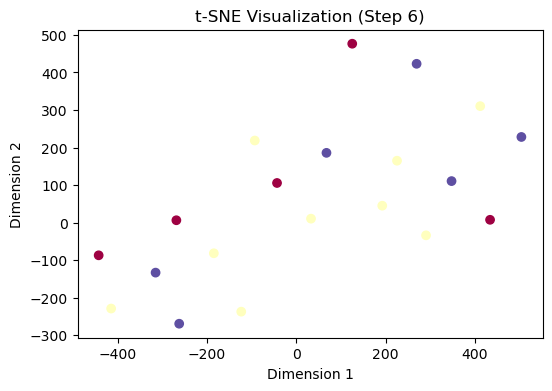

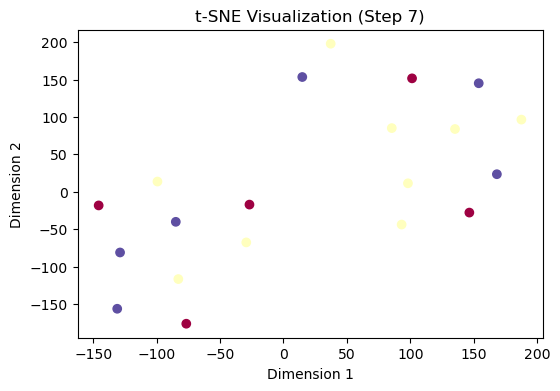

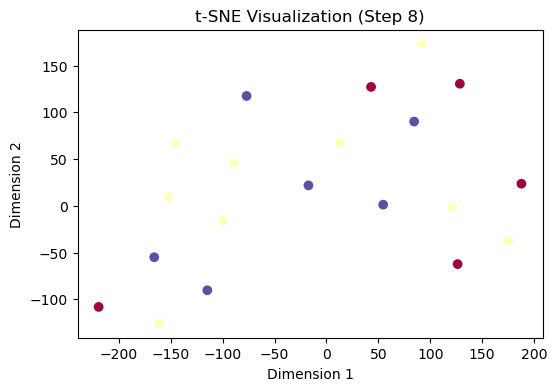

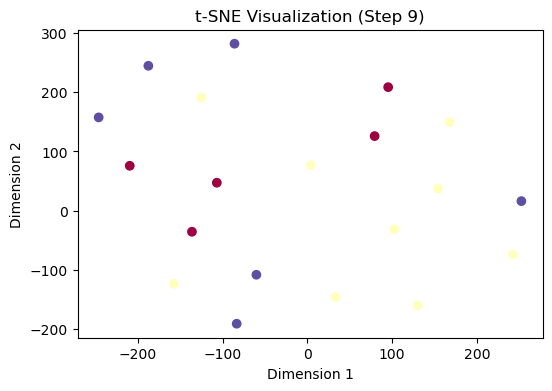

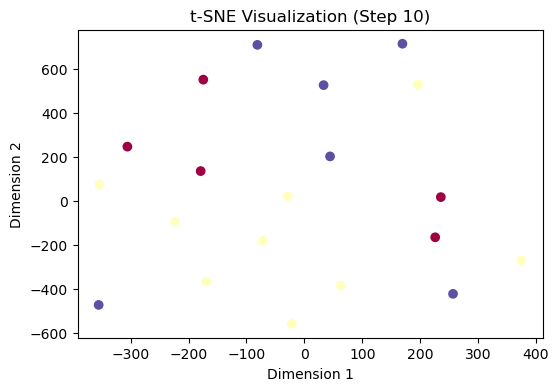

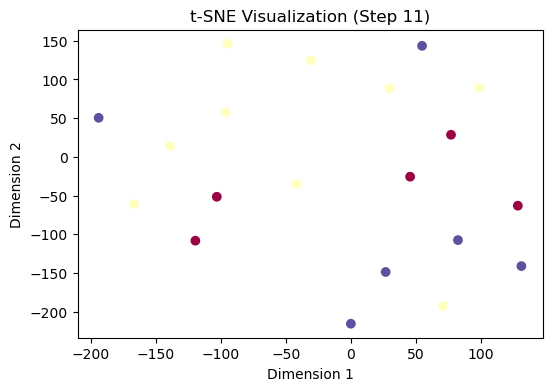

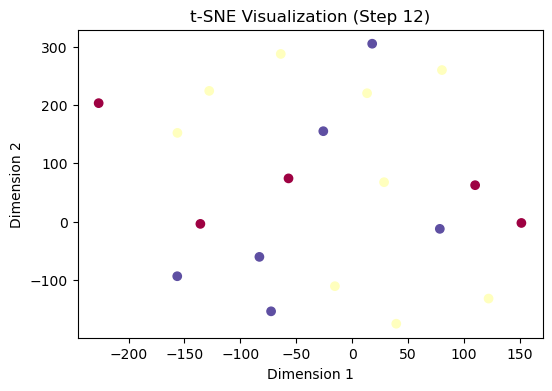

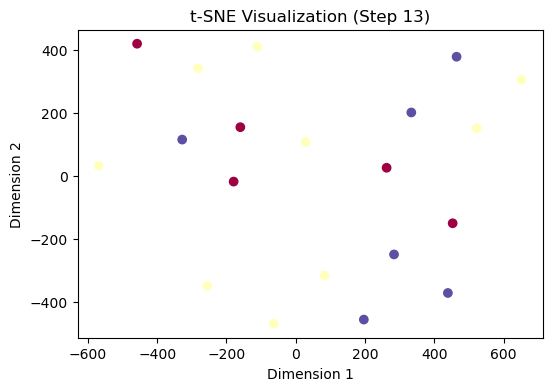

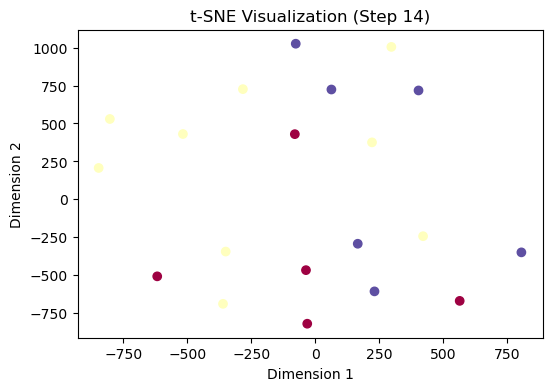

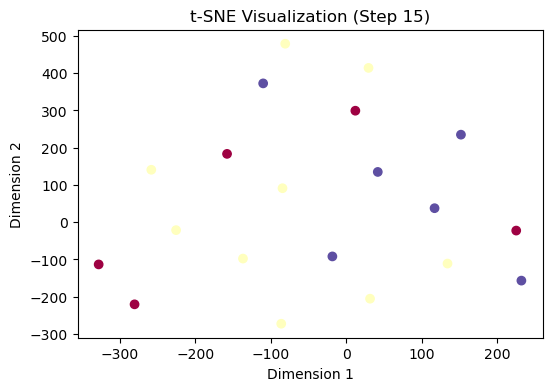

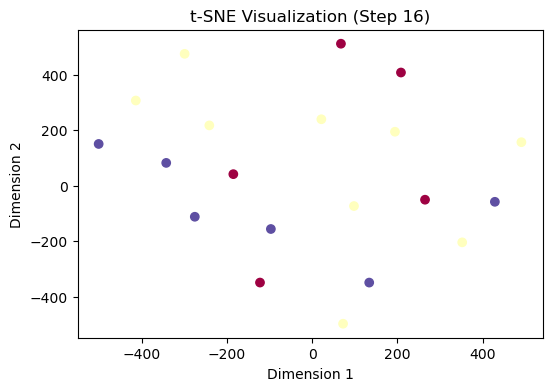

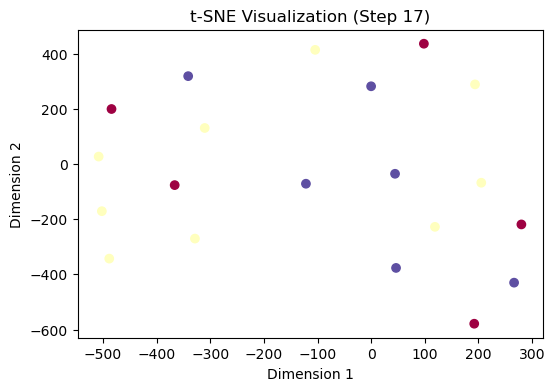

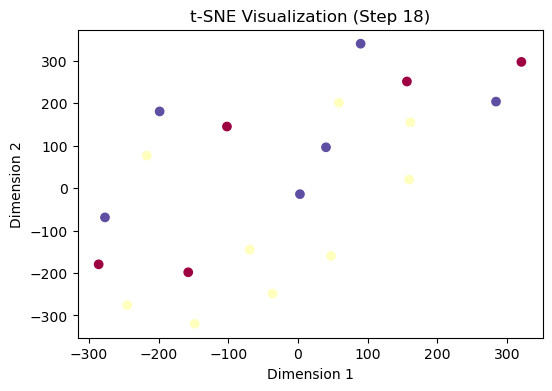

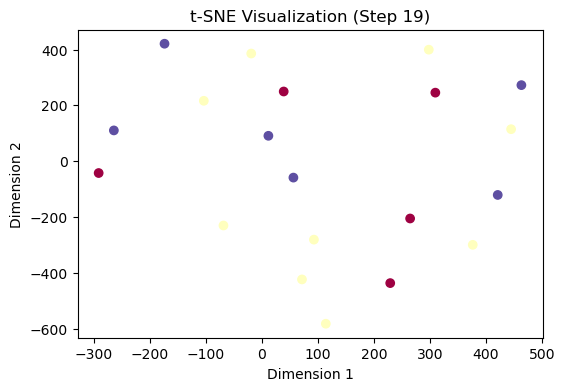

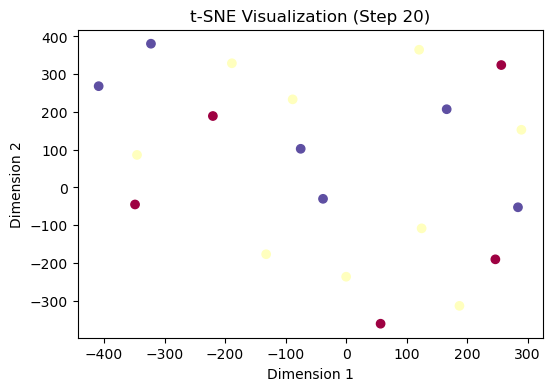

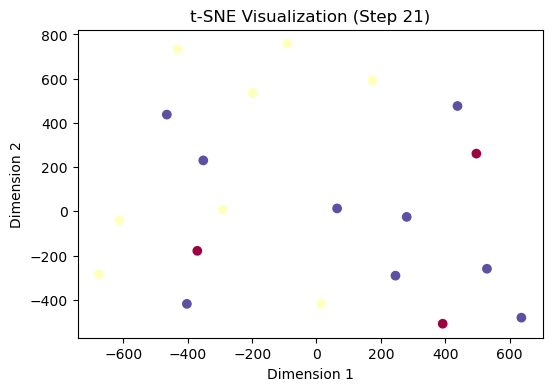

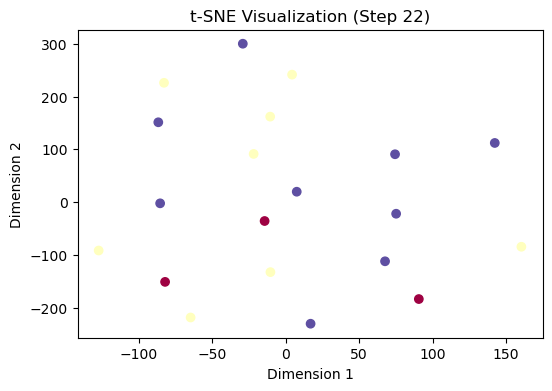

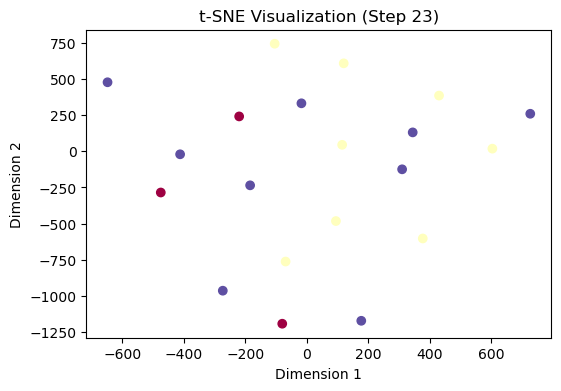

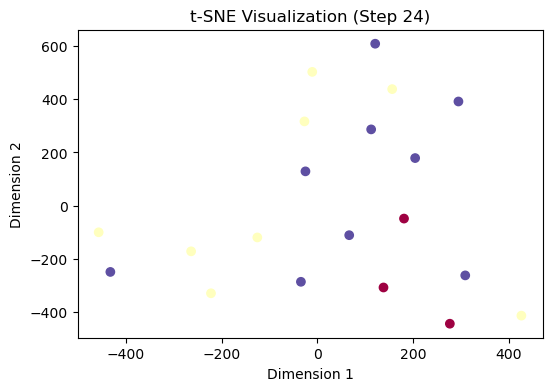

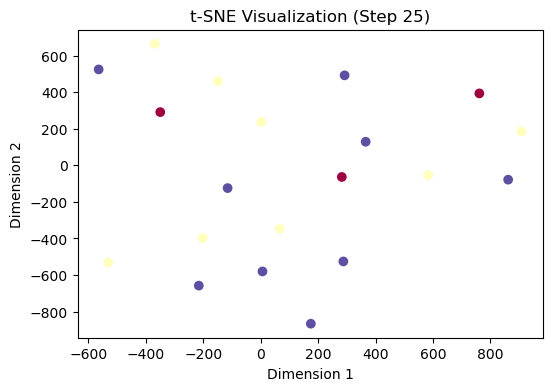

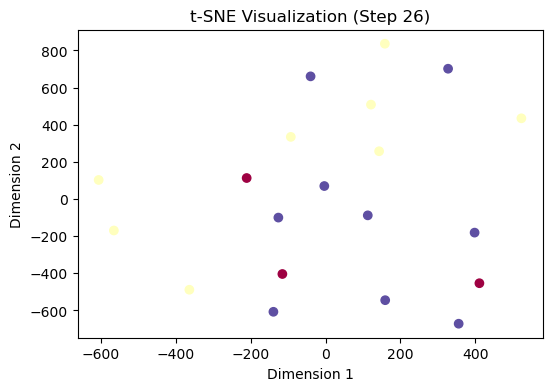

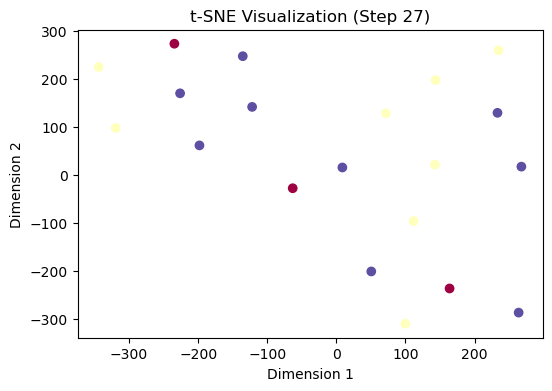

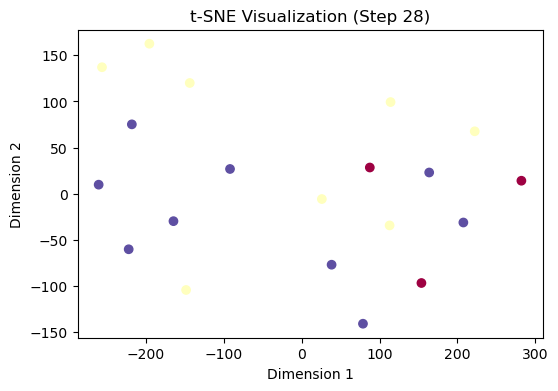

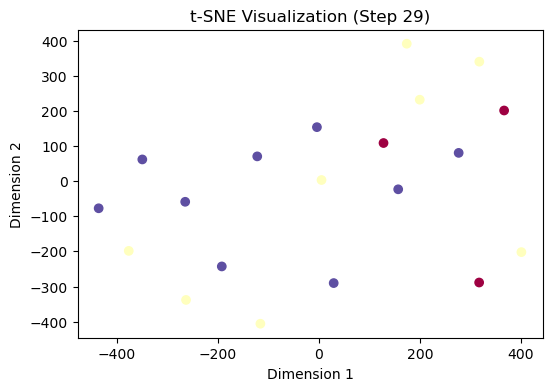

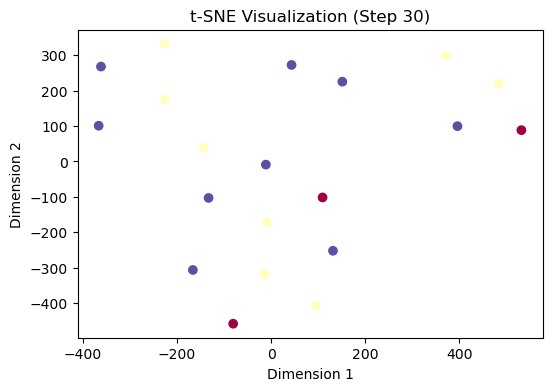

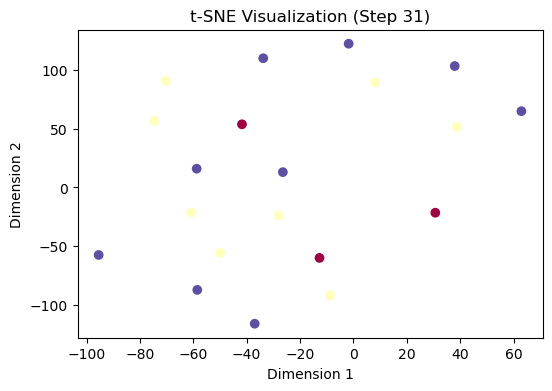

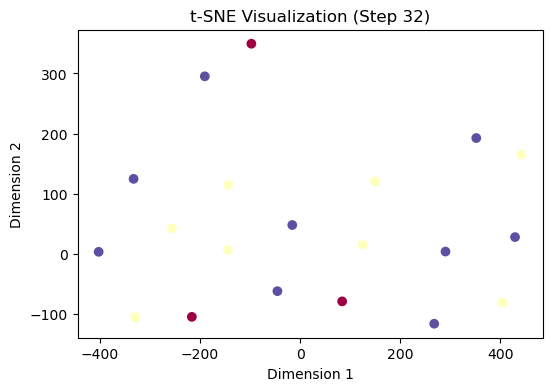

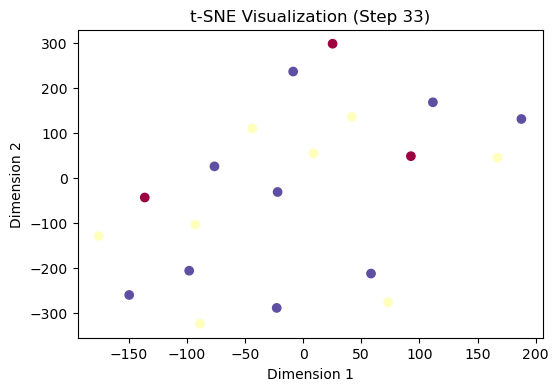

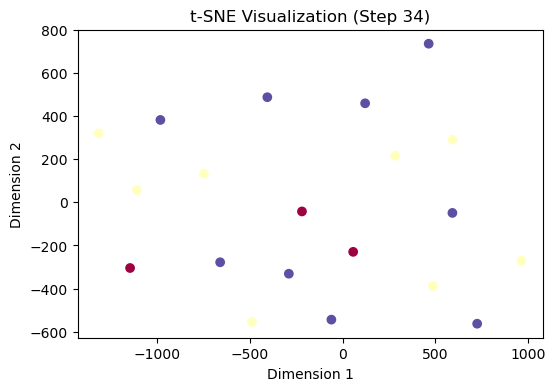

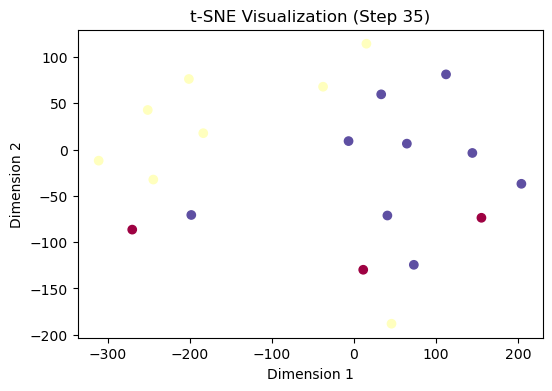

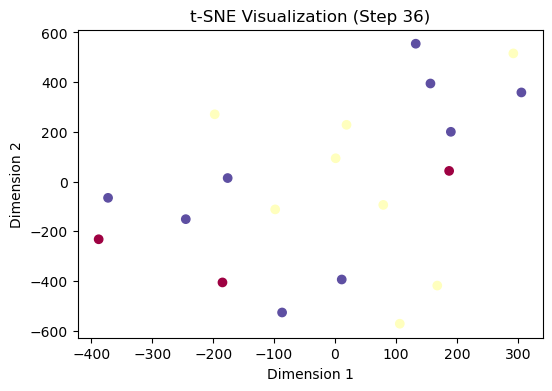

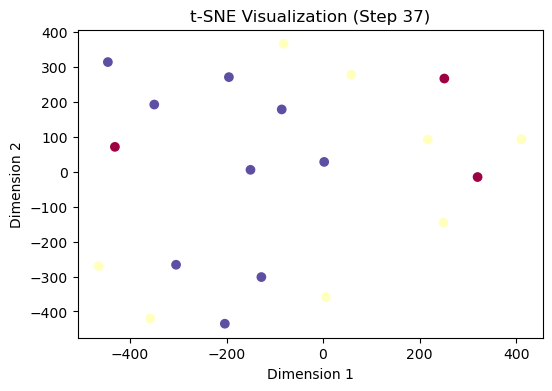

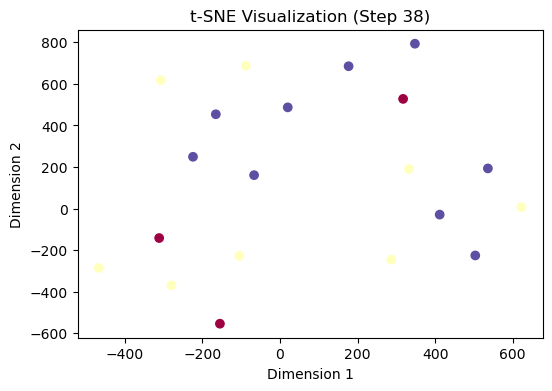

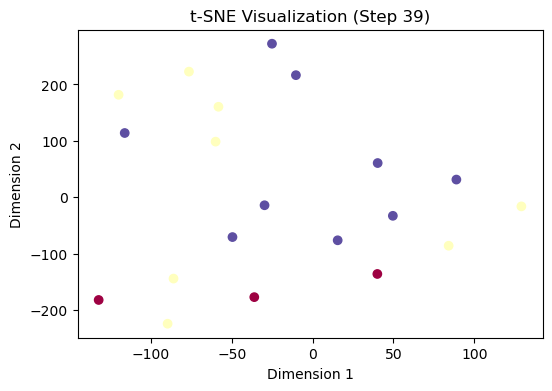

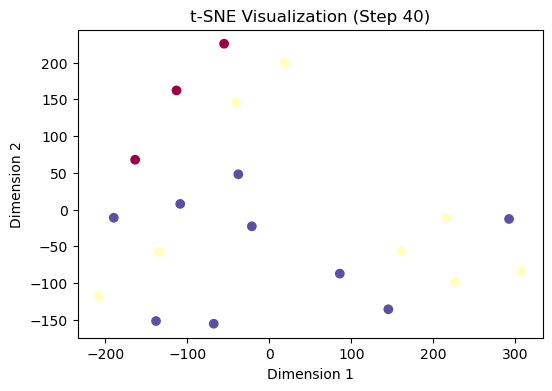

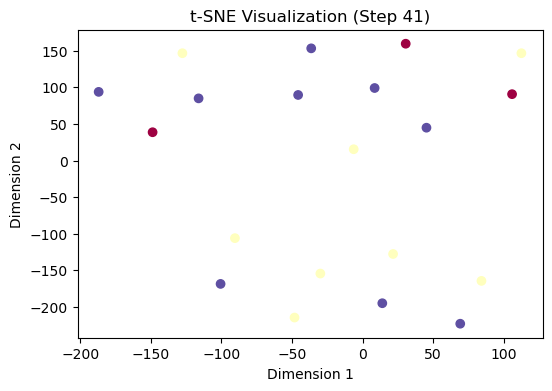

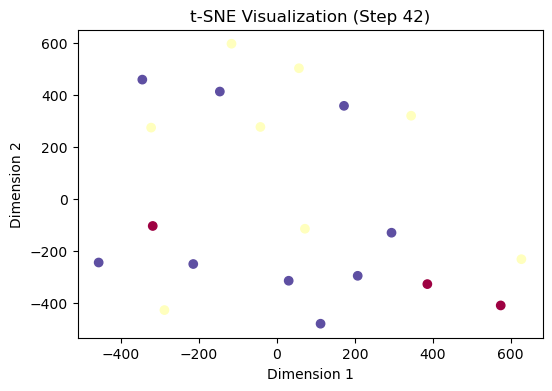

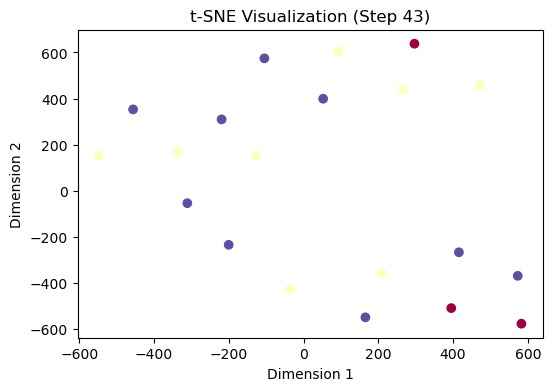

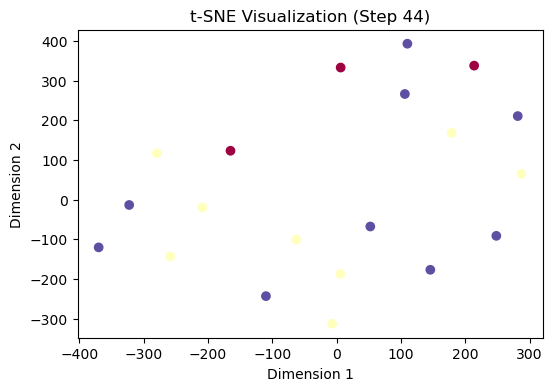

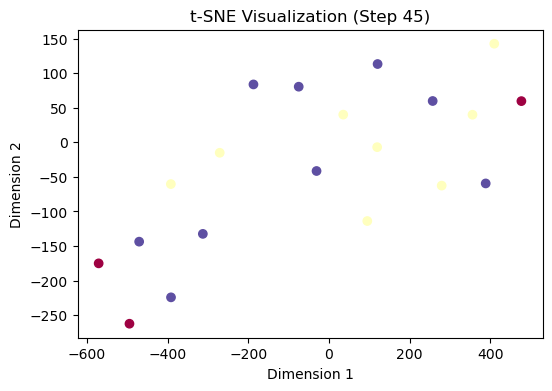

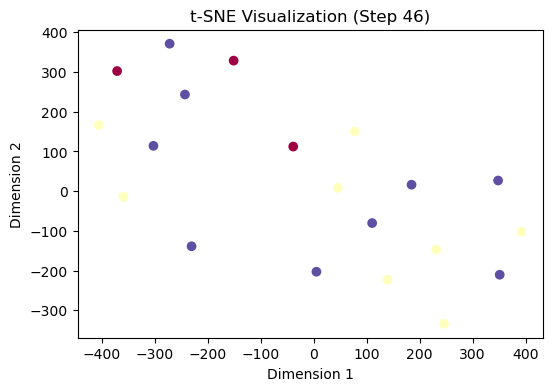

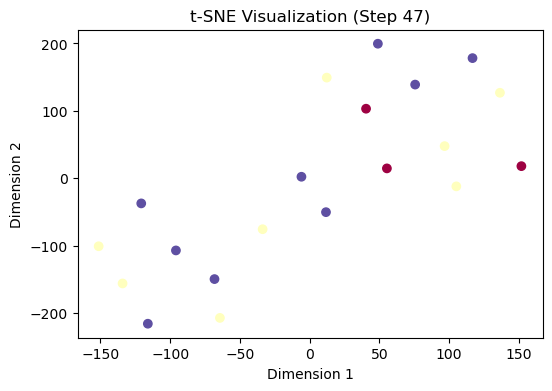

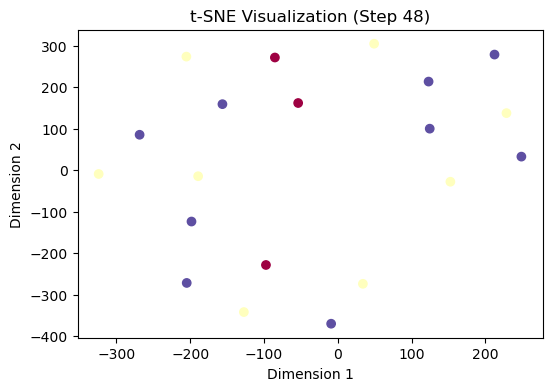

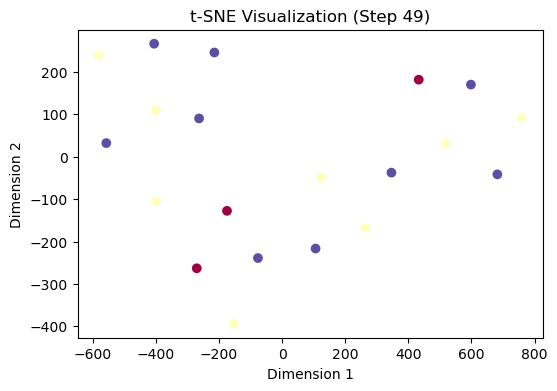

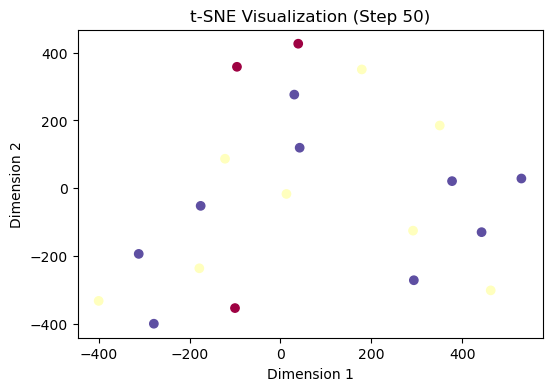

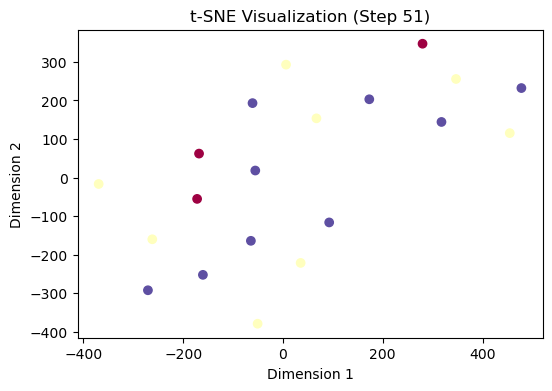

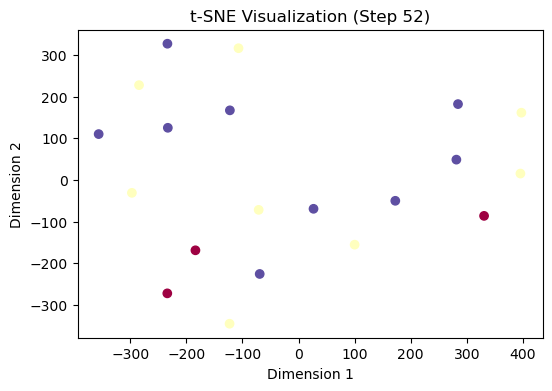

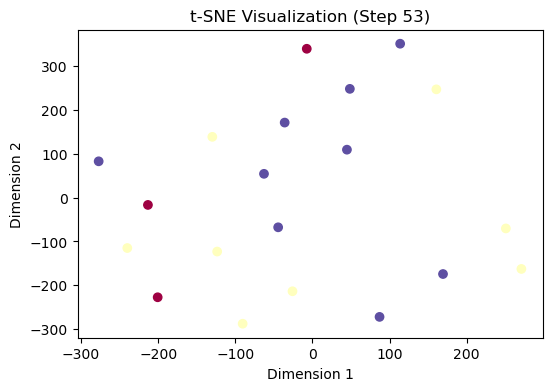

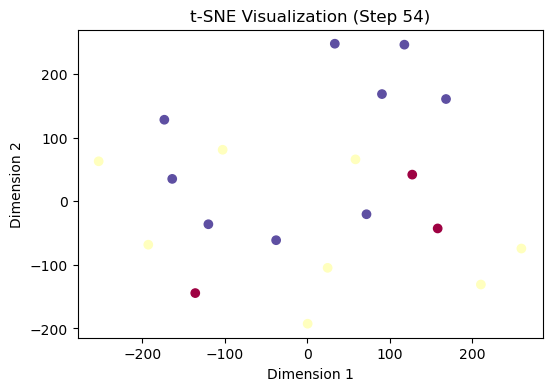

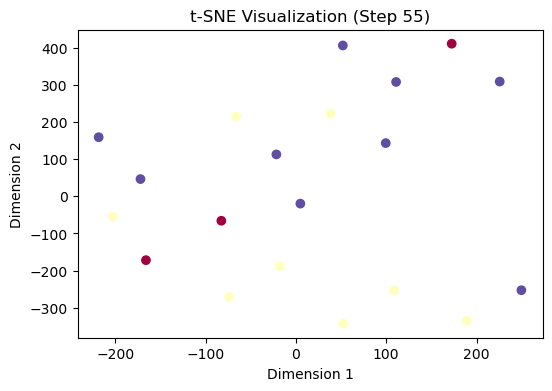

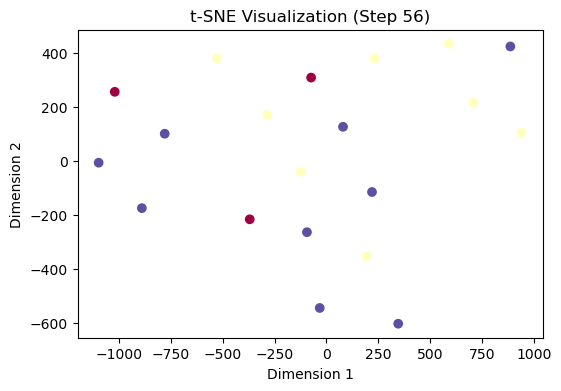

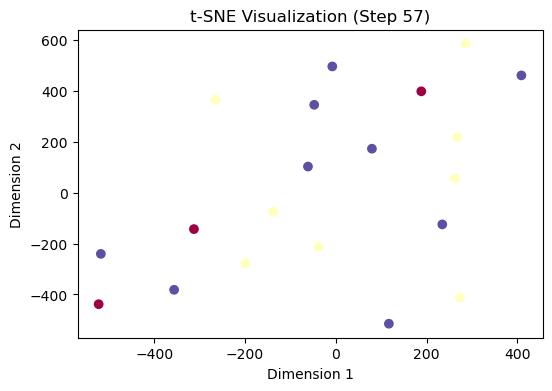

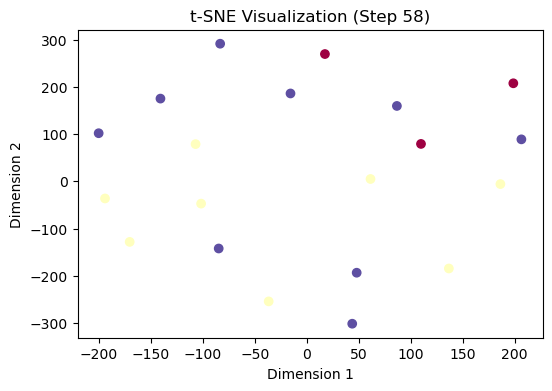

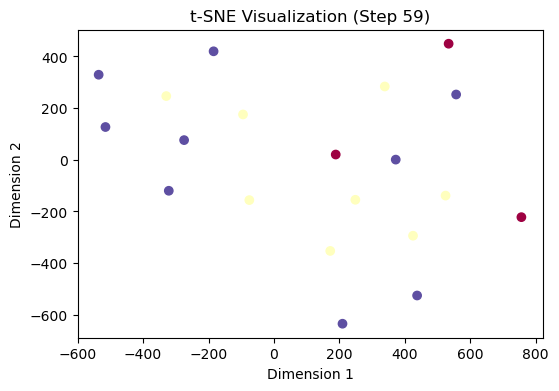

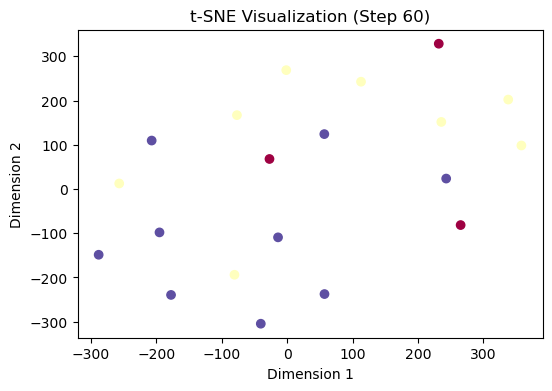

In [16]:
# Generate new data points and labels at each time step
for step in range(1, n_steps + 1):
    new_data = np.random.rand(10, 2)
    dynamic_dataset = np.vstack([dynamic_dataset, new_data])
    new_labels = np.random.choice([0, 1, 2], size=len(new_data))
    labels = np.hstack([labels, new_labels])

    # Perform K-NN sampling on the dynamic dataset
    def knn_sampling(X, k):
        train_sample = X.copy()
        while len(train_sample) > k:
            nn = NearestNeighbors(n_neighbors=k + 1).fit(train_sample)
            distances, indices = nn.kneighbors(train_sample)
            knn_scores = np.sum(distances[:, 1:], axis=1)

            nn_score = knn_scores / knn_scores.sum()
            mnn_score = np.zeros(len(train_sample))
            for i in range(len(train_sample)):
                mutual_neighbors = set(indices[i][1:]) & set(indices[i])
                mnn_score[i] = sum(nn_score[list(mutual_neighbors)])
            index = [i for i, score in enumerate(nn_score) if score == max(nn_score)]
            if len(index) > 1:
                mnn_scores = [mnn_score[i] for i in index]
                train_index = index[mnn_scores.index(max(mnn_scores))]
            else:
                train_index = index[0]
            train_sample = np.delete(train_sample, train_index, axis=0)
        return train_sample

    train_sample = knn_sampling(dynamic_dataset, k)

    # Perform t-SNE on the 'train_sample' data
    train_sample_tsne = tsne.fit_transform(train_sample)

    tsne_results.append(train_sample_tsne)
    all_labels.append(labels[:len(train_sample)])

# Visualize t-SNE results at each time step with colored clusters
print("\033[1mVisualization of  t-SNE results at each time step with colored clusters:\033[0m")

for step, (tsne_result, step_labels) in enumerate(zip(tsne_results, all_labels)):
    plt.figure(figsize=(6, 4))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=step_labels, cmap=plt.cm.Spectral)
    plt.title(f't-SNE Visualization (Step {step + 1})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
